<a href="https://colab.research.google.com/github/ady909/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Import librarties
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid",{'grid.linestyle': '--'})
import datetime as dt

In [2]:
from google.colab import files
upload = files.upload()

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices.csv


In [3]:
#loading data
bank_df = pd.read_csv("data_YesBank_StockPrices.csv" , encoding='unicode_escape')

## Dataset First View

In [5]:
#lets take a look at dataset
bank_df.head(n = 10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [7]:
#lets look at last elements
bank_df.tail(n = 10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [6]:
#lets check dimensions of dataset
bank_df.shape

(185, 5)

So there are total 185 datapoints and 4 Features and one target output i.e 'Close' column

## Dataset Information

In [8]:
#basic summary of dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Variables Description

Date - Date of the record.  Dates are given from July 2005 to November 2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical variable )

High - Highest price of the share for that day (Numerical variable)

Low - Lowest Price of the share for that day (Numerical variable)

Close - Closing price of the share for that day (Numerical variable)

'Date' column is given in Object datatype , We have to convert it into appropriet datatype.

##Data Cleaning

## Breaking Down 'Date' column and changing its datatype

In [12]:
from datetime import datetime

bank_df['Date']=pd.to_datetime(bank_df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [13]:
#lets take a look
bank_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [14]:
#upadated summary
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


##Checking if there are any duplicates

In [16]:
#duplicates or not
bank_df.duplicated().sum()

0

So there are no duplicates present here

## Checking null values present in the dataset

In [17]:
bank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Our data doesn't have any null values.


**That means our data doesn't have any Duplicate or Null values and its completely cleaned.**

## **Understanding Variables**

In [18]:
#columns
bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

Total 5 columns are present

In [20]:
#numerical variable summary
bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## **Exploratory Data Analysis (EDA)**

###**Univariate Analysis**

Lets analyse dependent variable i.e. 'Close'

In [21]:
#numerical summary
bank_df["Close"].describe()

count    185.000000
mean     105.204703
std       98.583153
min        9.980000
25%       33.450000
50%       62.540000
75%      153.300000
max      367.900000
Name: Close, dtype: float64

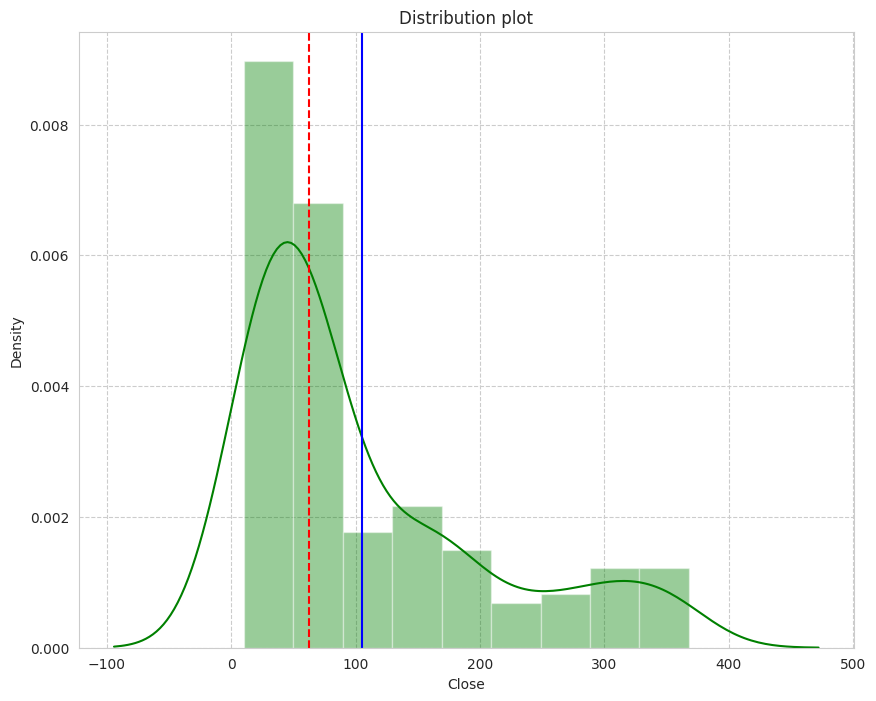

In [39]:
# distribution plot
plt.figure(figsize=(10,8))
sns.distplot(bank_df["Close"] , kde=True,color='g')
plt.axvline(bank_df['Close'].mean(),color='blue')
plt.axvline(bank_df['Close'].median(),color='red',linestyle='dashed')
plt.title("Distribution plot");

In [24]:
#checking skewness score
bank_df["Close"].skew()

1.2647251893515967

'Close' column has skewness score above +1 . That means it si positively skewed.
We need to reduce its skewness using transformation.

Some methods to remove skewness are :

square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

log for greater skew:log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

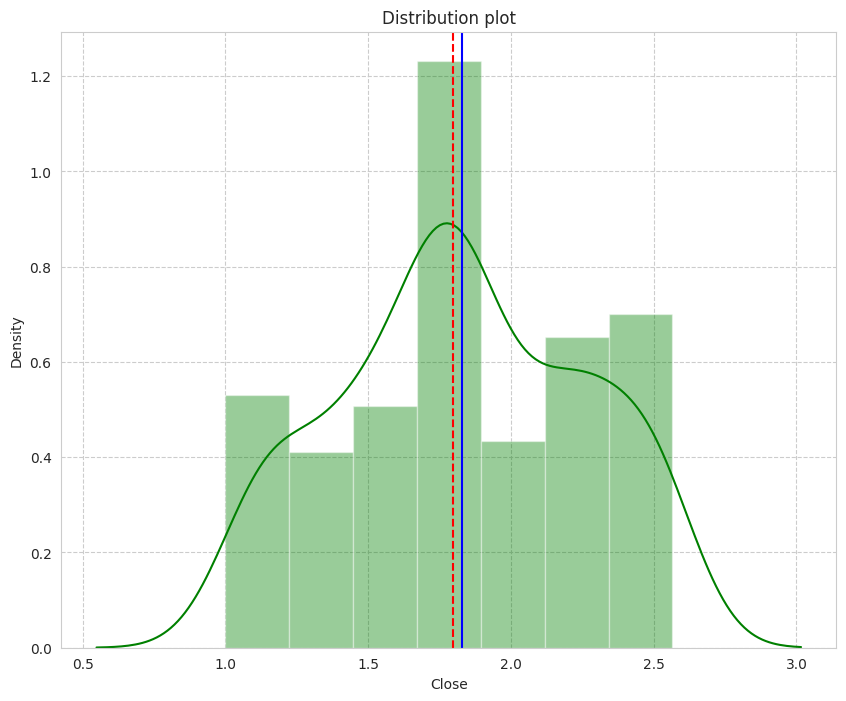

In [40]:
# applying log10 transformation
plt.figure(figsize=(10,8))
sns.distplot(np.log10(bank_df["Close"] ), kde=True,color='g')
plt.axvline(np.log10(bank_df["Close"]).mean(),color='blue')
plt.axvline(np.log10(bank_df["Close"]).median(),color='red',linestyle='dashed')
plt.title("Distribution plot");

In [33]:
#checking skewness score
np.log10(bank_df["Close"]).skew()

-0.027248053851873063

If skewness score is between -0.5 to 0.5 , its symmetrical . That means now it is almost normal distribution.

Median for 'Close' is 500 and we can see some outliers over there. So to remove them we have to use 'showfliers' parameter and set it to 'False'.

##Independent Variables

In [35]:
#making list of numerical variables
numerical_variables = list(bank_df.describe().columns[:-1])
numerical_variables

['Open', 'High', 'Low']

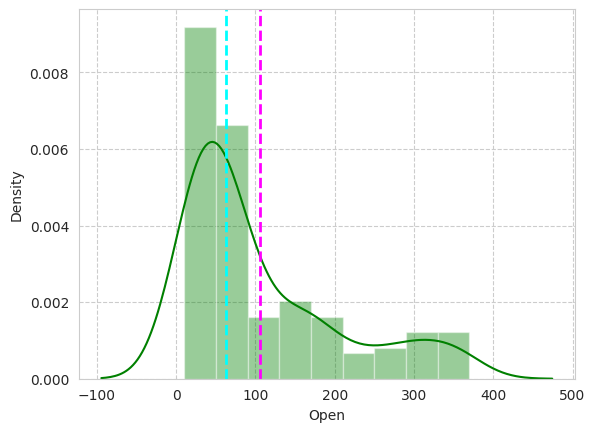

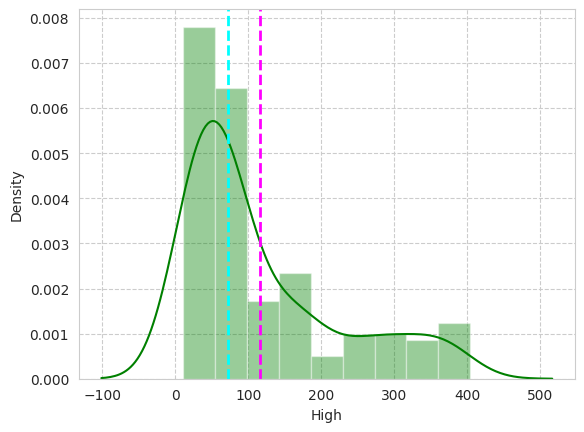

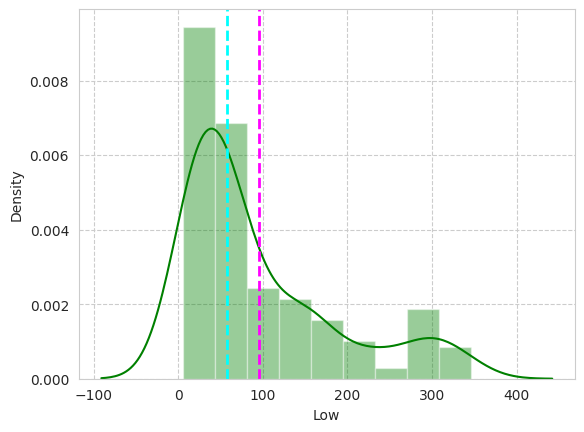

In [41]:
# histogram for each numerical feature count
for column in numerical_variables:
    num_feature = bank_df[column]
    sns.distplot(num_feature , color = 'g')
    plt.axvline(num_feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(num_feature.median(), color='cyan', linestyle='dashed', linewidth=2)

    plt.show()

All the independent variables are right skewed and transformation is required

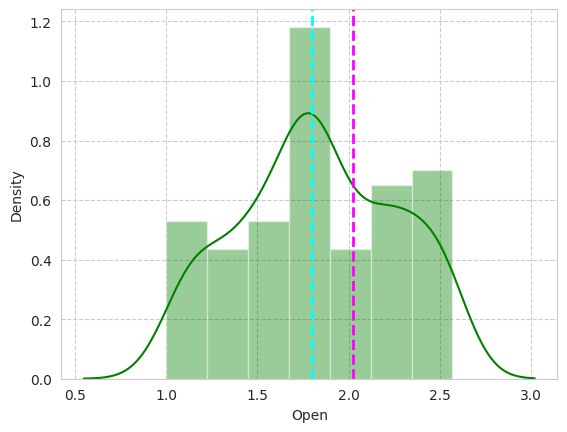

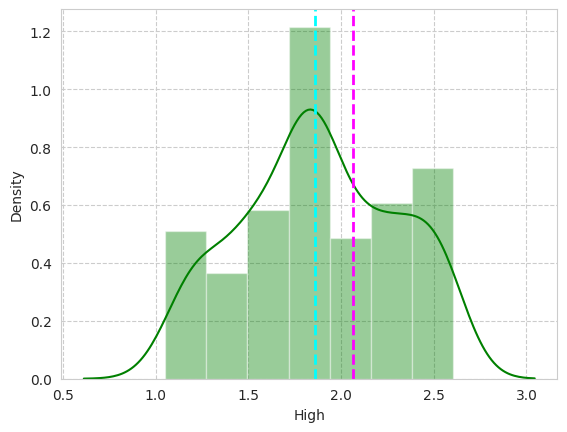

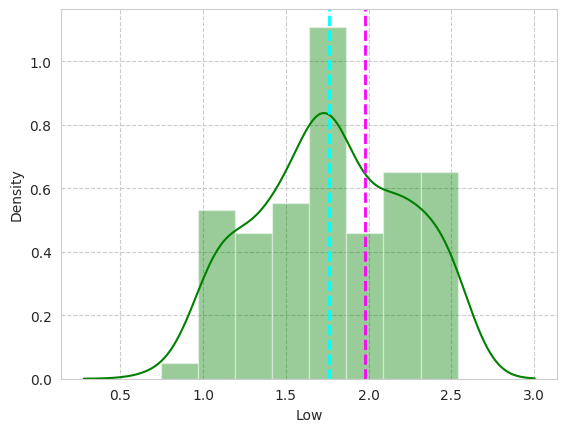

In [43]:
for column in numerical_variables:
    num_feature = bank_df[column]
    sns.distplot(np.log10(num_feature) , color = 'g')
    plt.axvline(np.log10(num_feature.mean()), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(np.log10(num_feature.median()), color='cyan', linestyle='dashed', linewidth=2)

    plt.show()

Checking outliers for numerical features

Due to log transformation there are no outliers. Thus these variables are good model building.

## **Bivariate Analysis**